<a href="https://colab.research.google.com/github/Knell999/ML_Ops_HK-Toss/blob/main/Chapter_1_%EA%B8%B0%EC%B4%88/02_%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%8F%84%EA%B5%AC/02_%EC%8B%9C%EA%B0%81%ED%99%94/04_plotly_%EA%B8%B0%EB%B0%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly 기초 사용 방법
- 인터렉티브한 그래프를 그릴 수 있는 라이브러리
- 웹에 시각화 결과를 손쉽게 내보낼 수 있게 html 파일도 제공

```
fig = px.그래프종류(data_frame=데이터, x=X축 컬럼, y=Y축 컬럼, color=범례 컬럼, title=제목,
                 labels=dict(X축 컬럼=X축 라벨, Y축 컬럼=Y축 라벨),
                 width=그래프 가로길이, height=그래프 세로길이, text_auto=True/False)
fig.show()
```

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [ ]:
# 예제 데이터 세트 불러오기
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df_group = df.groupby("species")[["body_mass_g"]].mean().reset_index()
df_group

,species,body_mass_g
0,Adelie,3700.662252
1,Chinstrap,3733.088235
2,Gentoo,5076.016260


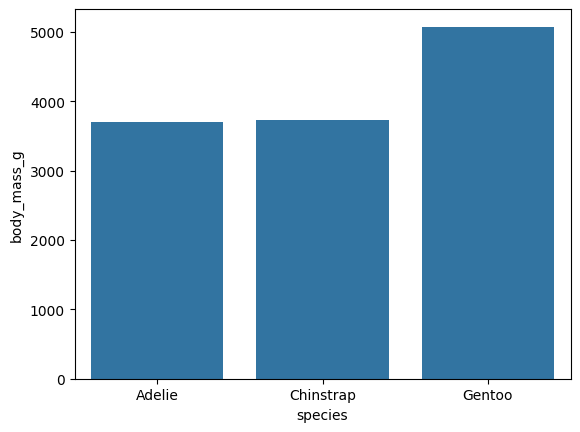

In [ ]:
# Seaborn으로 시각화
sns.barplot(data=df_group, x='species', y='body_mass_g')
plt.show()

In [ ]:
fig = px.bar(
    data_frame=df_group,
    x='species',
    y='body_mass_g'
)
fig.show()

In [ ]:
df_group2 = df.groupby(["island", "sex"])[["body_mass_g"]].mean().reset_index()
df_group2

,island,sex,body_mass_g
0,Biscoe,Female,4319.375000
1,Biscoe,Male,5104.518072
2,Dream,Female,3446.311475
3,Dream,Male,3987.096774
4,Torgersen,Female,3395.833333
5,Torgersen,Male,4034.782609


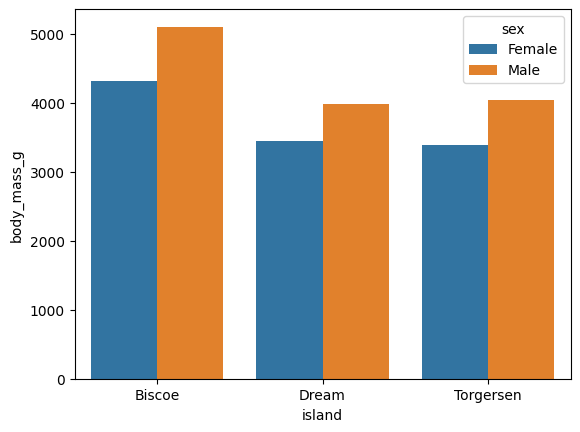

In [ ]:
sns.barplot(
    data=df_group2,
    x='island',
    y='body_mass_g',
    hue='sex'
)

plt.show()

In [ ]:
fig = px.bar(
    data_frame=df_group2,
    x='island',
    y='body_mass_g',
    color='sex'
)
fig.show()

In [ ]:
fig = px.bar(
    data_frame=df_group2,
    x='island',
    y='body_mass_g',
    color='sex',
    barmode='group',
    text_auto=".3f",
    width=700,
    height=500,
    title="island 별 몸무게 평균",
    labels={
        "body_mass_g": "몸무게(g)",
        "island" : '',
        'sex': '성별'
    }
)
fig.show()

## 스타일 설정
```
template=템플릿명
color_discrete_sequence = 컬러맵명 #범주형 데이터
color_continuous_scale= 컬러맵명 #연속형 데이터
```

In [ ]:
for temp in ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark']:
    fig = px.bar(data_frame=df_group2, x='island', y='body_mass_g', color='sex', barmode='group', text_auto='.0d', width=700, height=500, title=f'템플릿: {temp}', labels=dict(body_mass_g='몸무게(g)', island='', sex='성별'), template=temp)
    fig.show()

In [ ]:
# 컬러맵 적용
fig = px.colors.sequential.swatches_continuous()
fig.show()

In [ ]:
fig = px.colors.qualitative.swatches()
fig.show()

In [ ]:
# 범주형 컬러 템플릿
px.colors.qualitative.Pastel

['rgb(102, 197, 204)',
 'rgb(246, 207, 113)',
 'rgb(248, 156, 116)',
 'rgb(220, 176, 242)',
 'rgb(135, 197, 95)',
 'rgb(158, 185, 243)',
 'rgb(254, 136, 177)',
 'rgb(201, 219, 116)',
 'rgb(139, 224, 164)',
 'rgb(180, 151, 231)',
 'rgb(179, 179, 179)']

In [ ]:
for color_map in [px.colors.qualitative.Pastel1, px.colors.qualitative.Safe, px.colors.qualitative.Antique]:
    fig = px.bar(data_frame=df_group2,
                 x='sex',
                 y='body_mass_g',
                 color='island',
                 barmode='group',
                 text_auto='.0d',
                 width=700, height=500,
                 color_discrete_sequence=color_map)
    fig.show()

In [ ]:
for color_map in [px.colors.sequential.Burg, px.colors.sequential.Mint, px.colors.sequential.PuBuGn]:
    fig = px.scatter(data_frame=df,
                     x='bill_length_mm',
                     y='bill_depth_mm',
                     color='flipper_length_mm',
                     width=700, height=500,
                     color_continuous_scale=color_map,
                     template='simple_white')
    fig.show()

## html 파일 저장

In [ ]:
fig = px.scatter(
    data_frame=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    color='flipper_length_mm',
    width=700,
    height=500,
    color_continuous_scale=px.colors.sequential.PuBuGn
)
fig.show()

# write_html
fig.write_html("test.html")

# Plotly 시각화

## scatter
```
px.scatter(data_frame=데이터, x=X축 컬럼, y=Y축 컬럼, color=색, trendline='ols') #trendline은 추세선 추가
```

In [ ]:
fig = px.scatter(
    data_frame = df,
    x='bill_length_mm',
    y='bill_depth_mm',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white'
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame = df,
    x='bill_length_mm',
    y='bill_depth_mm',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white',
    color='sex'
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame = df,
    x='bill_length_mm',
    y='bill_depth_mm',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white',
    color='island',
    symbol='sex'
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame = df,
    x='bill_length_mm',
    y='bill_depth_mm',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white',
    color='sex',
    facet_col='island'
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame = df,
    x='bill_length_mm',
    y='bill_depth_mm',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white',
    trendline='ols'
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame = df,
    x='bill_length_mm',
    y='bill_depth_mm',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white',
    color='sex',
    facet_col='island',
    trendline='ols'
)
fig.show()

## historgram
```
px.histogram(data_frame=데이터, x=X축 컬럼, color=색)
```

In [ ]:
fig = px.histogram(
    data_frame=df,
    x='flipper_length_mm',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white'
)

fig.show()

## boxplot

In [ ]:
fig = px.box(
    data_frame=df,
    x='body_mass_g',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white'
)

fig.show()

In [ ]:
fig = px.box(
    data_frame=df,
    x='body_mass_g',
    y='species',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white'
)

fig.show()